Hello Rossi!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [68]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import pandas as pd

import math
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.preprocessing import StandardScaler

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Code for libraries updating should be placed before imports and not after. If you place it after imports, it doesn't affect on the imported libraries.
</div>

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [70]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [71]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [72]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3777,1,23.0,38400.0,1,0
2824,1,40.0,41900.0,1,0
573,1,45.0,27200.0,1,1
1208,0,26.0,32100.0,1,0
3586,0,30.0,33700.0,1,0
1587,0,22.0,34200.0,2,0
2584,1,20.0,33600.0,0,0
2875,1,35.0,40500.0,3,0
4370,1,32.0,21800.0,1,0
1863,0,46.0,38900.0,1,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [74]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [75]:
# check to see that the conversion was successful
df.dtypes

gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
dtype: object

In [76]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?

display(df.describe())

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

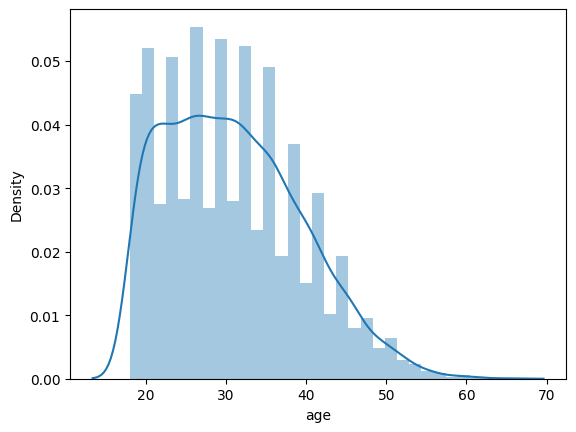

In [77]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='income', ylabel='Density'>

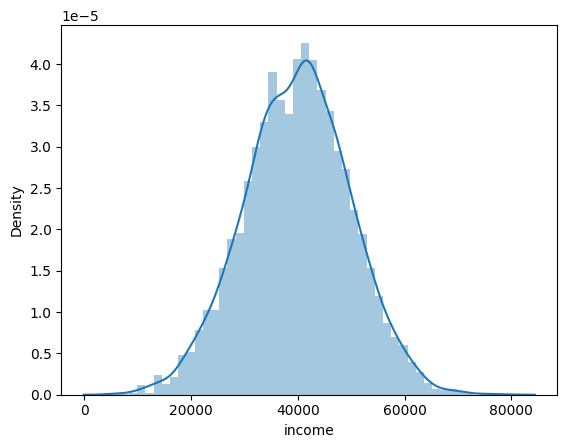

In [78]:
sns.distplot(df['income'])

### Conclusion 

The dataset has no missing or null values. Despite the presence of some outliers, the mean and median ages in the age column are identical. Conversely, the income data is negatively skewed, with the median income being higher than the mean.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct
</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

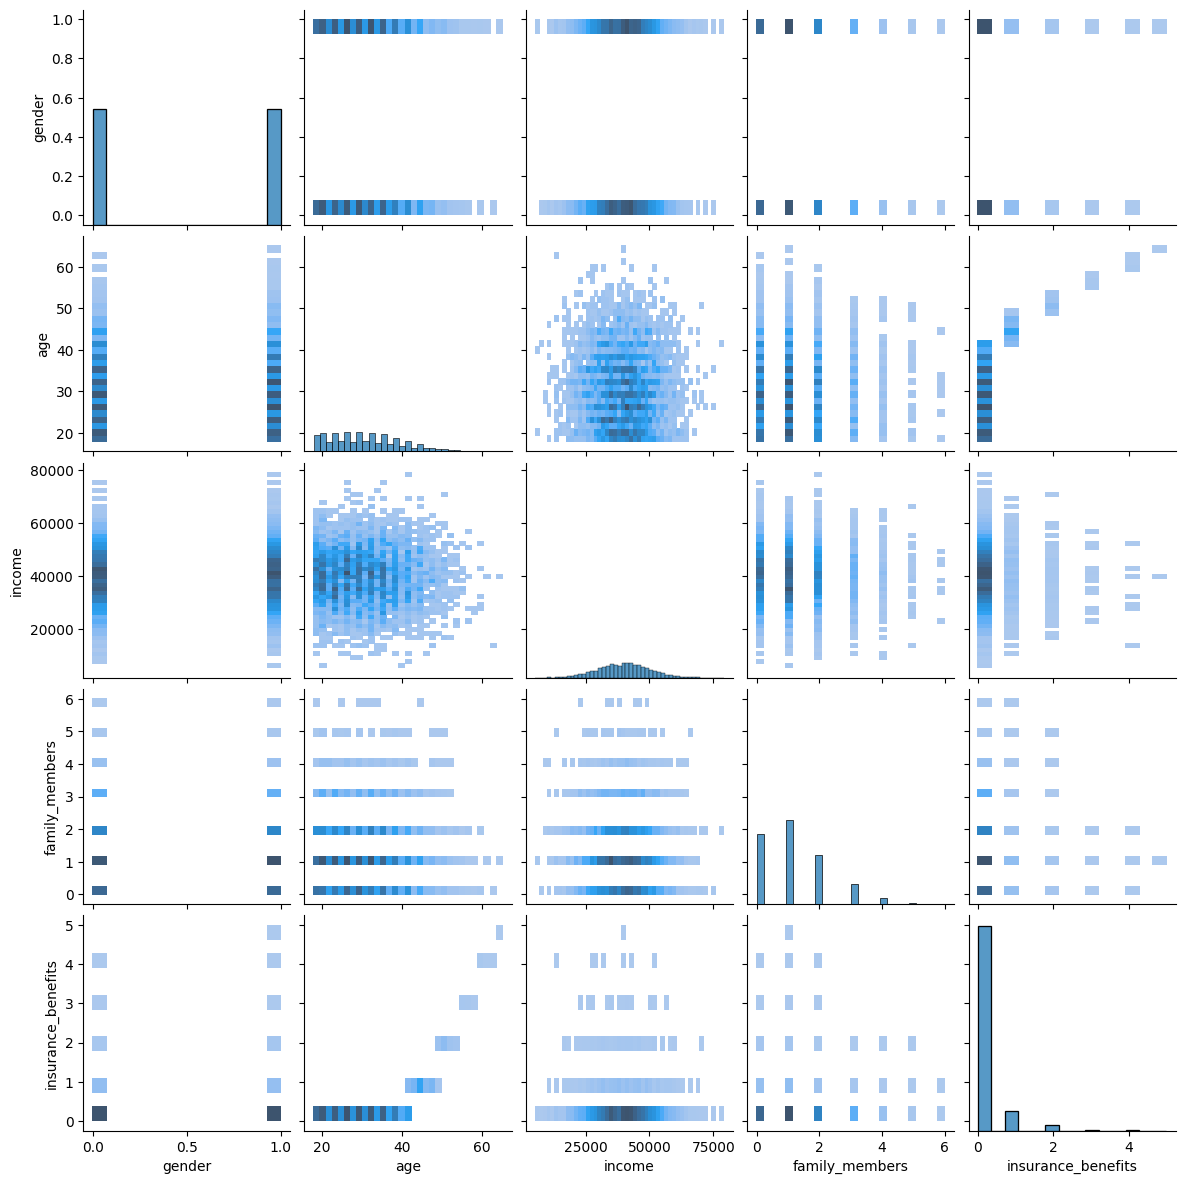

In [79]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [80]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [81]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors= k, metric = metric )
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], 
                                                   k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [82]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [83]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
450,0.0,0.446154,0.592405,0.000000,0
3475,0.0,0.646154,0.740506,0.166667,1
3544,1.0,0.523077,0.393671,0.333333,0
2072,0.0,0.292308,0.406329,0.000000,0
4010,0.0,0.861538,0.631646,0.166667,3


Now, let's get similar records for a given one for every combination

In [84]:
man_scaled = get_knn(df_scaled, 4, 7, 'manhattan')
man_scaled

,gender,age,income,family_members,insurance_benefits,distance
4,1.0,0.430769,0.330380,0.0,0,0.000000
349,1.0,0.430769,0.322785,0.0,0,0.007595
3934,1.0,0.430769,0.321519,0.0,0,0.008861
3665,1.0,0.430769,0.317722,0.0,0,0.012658
1435,1.0,0.446154,0.331646,0.0,0,0.016650
2448,1.0,0.446154,0.324051,0.0,0,0.021714
1774,1.0,0.400000,0.331646,0.0,0,0.032035


In [85]:
euc_scaled = get_knn(df_scaled, 4, 7, 'euclidean')
euc_scaled

,gender,age,income,family_members,insurance_benefits,distance
4,1.0,0.430769,0.330380,0.0,0,0.000000
349,1.0,0.430769,0.322785,0.0,0,0.007595
3934,1.0,0.430769,0.321519,0.0,0,0.008861
3665,1.0,0.430769,0.317722,0.0,0,0.012658
1435,1.0,0.446154,0.331646,0.0,0,0.015437
2448,1.0,0.446154,0.324051,0.0,0,0.016636
1401,1.0,0.446154,0.351899,0.0,0,0.026453


In [86]:
man_not_scaled = get_knn(df, 4, 7, 'manhattan')
man_not_scaled

,gender,age,income,family_members,insurance_benefits,distance
4,1,28,26100.0,0,0,0.0
2701,1,31,26100.0,3,0,6.0
2773,1,24,26100.0,2,0,6.0
3346,0,34,26100.0,0,0,7.0
4721,1,22,26100.0,2,0,8.0
1507,1,35,26100.0,2,0,9.0
3462,0,35,26100.0,2,0,10.0


In [87]:
euc_not_scaled = get_knn(df, 4, 7, 'euclidean')
euc_not_scaled

,gender,age,income,family_members,insurance_benefits,distance
4,1,28,26100.0,0,0,0.000000
2701,1,31,26100.0,3,0,4.242641
2773,1,24,26100.0,2,0,4.472136
3346,0,34,26100.0,0,0,6.082763
4721,1,22,26100.0,2,0,6.324555
1507,1,35,26100.0,2,0,7.280110
3462,0,35,26100.0,2,0,7.348469


When the manhatten or eculidean distances are used in the calculation of distance, the results differ.

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Put your answer here.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'family_members'}>]], dtype=object)

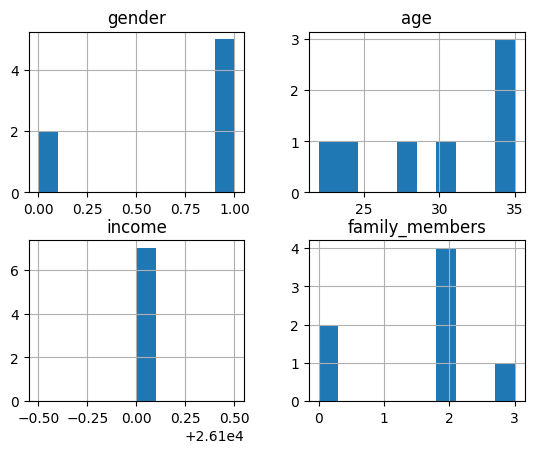

In [88]:
# distribution of features using the unscaled data 
man_not_scaled[feature_names].hist()

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'family_members'}>]], dtype=object)

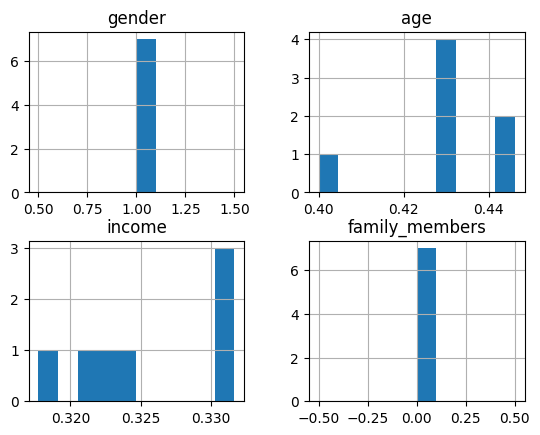

In [89]:
man_scaled[feature_names].hist()
# Distribution of features using scaled data

The above graphs display the results for both unscaled and scaled data. The k-Nearest Neighbors (kNN) algorithm is sensitive to unscaled data because it prioritizes features with larger numerical ranges. Additionally, selecting the number of neighbors (K) for predictions significantly influences the outcomes. Consequently, during prediction, features with larger values dominate the distance calculations, thereby impacting the results.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Put your answer here.

Text(0, 0.5, 'Fequency')

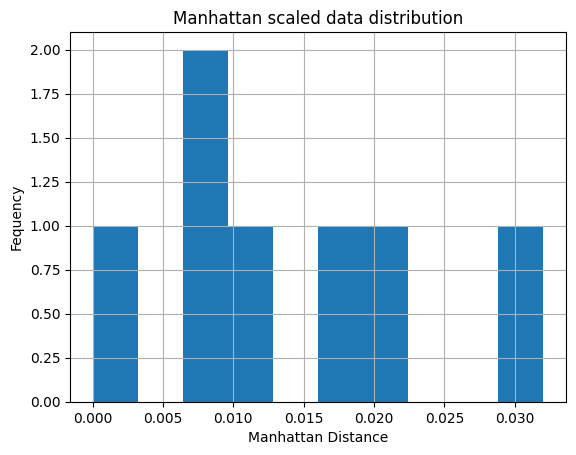

In [90]:
man_scaled.distance.hist()
plt.title('Manhattan scaled data distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Fequency')

Text(0, 0.5, 'Fequency')

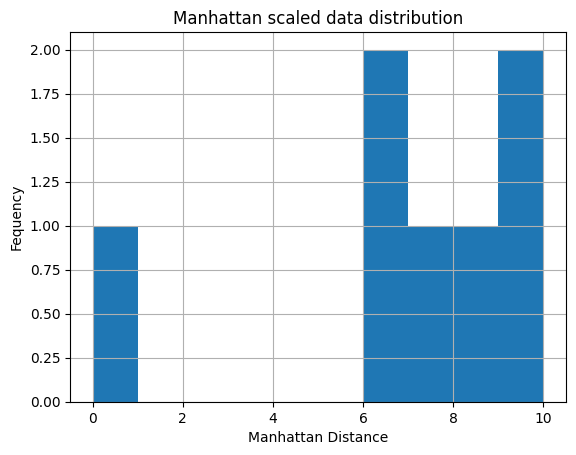

In [91]:
man_not_scaled.distance.hist()
plt.title('Manhattan scaled data distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Fequency')

The results using the Manhattan distance metric are not directly comparable between scaled and unscaled data due to the significant impact of scaling on distance computation. Scaling standardizes feature ranges, resulting in more consistent and smaller distance values, while unscaled data leads to a broader distribution influenced by the magnitude of the feature values.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [92]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] >0).astype(int) 

In [93]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts(normalize=True)

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64

In [94]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [95]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [96]:
#train random model

train, test = train_test_split(df, test_size=.3,
                              stratify=df['insurance_benefits_received'], random_state=123)
x_train = train[feature_names]
x_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predict_y = knn.predict(x_test)
eval_classifier(y_test,predict_y )

F1: 0.41
Confusion Matrix
[[0.88       0.00733333]
 [0.082      0.03066667]]


In [98]:
k = np.arange(1,11)
for k in k:
    print('F1 score and confusion matrix for k:')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    predict_y = knn.predict(x_test)
    eval_classifier(y_test,predict_y )
    print()

F1 score and confusion matrix for k:
F1: 0.69
Confusion Matrix
[[0.876      0.01133333]
 [0.04666667 0.066     ]]

F1 score and confusion matrix for k:
F1: 0.38
Confusion Matrix
[[0.88533333 0.002     ]
 [0.08533333 0.02733333]]

F1 score and confusion matrix for k:
F1: 0.41
Confusion Matrix
[[0.88       0.00733333]
 [0.082      0.03066667]]

F1 score and confusion matrix for k:
F1: 0.21
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [9.93333333e-02 1.33333333e-02]]

F1 score and confusion matrix for k:
F1: 0.21
Confusion Matrix
[[0.88333333 0.004     ]
 [0.09866667 0.014     ]]

F1 score and confusion matrix for k:
F1: 0.15
Confusion Matrix
[[0.88733333 0.        ]
 [0.10333333 0.00933333]]

F1 score and confusion matrix for k:
F1: 0.16
Confusion Matrix
[[0.886      0.00133333]
 [0.10266667 0.01      ]]

F1 score and confusion matrix for k:
F1: 0.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.11266667 0.        ]]

F1 score and confusion matrix for k:
F1: 0.01
Confusion Matrix
[

In [99]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df[feature_names].shape[0])# <your code here> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



k-Nearest Neighbors (k-NN) Classifier Evaluation
In the first section, a k-Nearest Neighbors (k-NN) classifier is evaluated with various values of k, ranging from 1 to 10. The process begins by initializing an array k with values from 1 to 10 and iterating through each value. For each k, a k-NN classifier is instantiated and trained using the training data (x_train, y_train). The trained model then predicts the labels (predict_y) for the test data (x_test). The eval_classifier function is subsequently used to compute and print the F1 score and confusion matrix for each value of k. The results demonstrate significant variability in the F1 score, indicating that the model's performance fluctuates with different k values. For instance, the highest F1 score observed is 0.69 for k=1, but it drops to 0.00 for k=8 and k=10, showing that the choice of k critically impacts the classifier's effectiveness.

Random Model Evaluation
The second section evaluates a random model using different predefined probabilities (P). The loop iterates over a list of probabilities: 0, the mean of insurance_benefits_received, 0.5, and 1. For each probability P, the rnd_model_predict function generates random predictions based on the given probability. The eval_classifier function then computes and prints the F1 score and confusion matrix for each probability. The results reveal how the random model's performance changes with varying probability settings. At P=0, the F1 score is 0.00, indicating poor performance. However, at P=0.11, the F1 score increases to 0.12, and further changes are observed as the probability values shift to 0.5 and 1.0. This section highlights the impact of different probability thresholds on the performance of random predictions.

In summary, the k-NN classifier's performance is highly dependent on the choice of k, with optimal performance at specific values and substantial decline at others. In contrast, the random model's performance varies with different probability settings, illustrating the influence of probability thresholds on prediction outcomes.

### Scaled Data

In [100]:
df_scaled['insurance_benefits_received'] = df_scaled.insurance_benefits >0

In [101]:
target = df_scaled['insurance_benefits_received']
feature= df_scaled[feature_names]

x_train,x_test,y_train,y_test = train_test_split(feature, target, 
                                                test_size=.3, random_state=123)

In [102]:
k = np.arange(1,11)
for k in k:
    print('Scaled data F1 score and confusion matrix: ')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    eval_classifier(y_test, knn.predict(x_test))
    print()

Scaled data F1 score and confusion matrix: 
F1: 0.95
Confusion Matrix
[[0.88266667 0.004     ]
 [0.00733333 0.106     ]]

Scaled data F1 score and confusion matrix: 
F1: 0.92
Confusion Matrix
[[8.86000000e-01 6.66666667e-04]
 [1.53333333e-02 9.80000000e-02]]

Scaled data F1 score and confusion matrix: 
F1: 0.93
Confusion Matrix
[[0.88533333 0.00133333]
 [0.01266667 0.10066667]]

Scaled data F1 score and confusion matrix: 
F1: 0.90
Confusion Matrix
[[0.88666667 0.        ]
 [0.02066667 0.09266667]]

Scaled data F1 score and confusion matrix: 
F1: 0.92
Confusion Matrix
[[0.88333333 0.00333333]
 [0.01333333 0.1       ]]

Scaled data F1 score and confusion matrix: 
F1: 0.93
Confusion Matrix
[[0.88666667 0.        ]
 [0.01533333 0.098     ]]

Scaled data F1 score and confusion matrix: 
F1: 0.94
Confusion Matrix
[[0.88533333 0.00133333]
 [0.01133333 0.102     ]]

Scaled data F1 score and confusion matrix: 
F1: 0.93
Confusion Matrix
[[0.88666667 0.        ]
 [0.01466667 0.09866667]]

Scaled d

The k-NN classifier's performance on scaled data remains consistently high across different values of k, with F1 scores ranging from 0.90 to 0.95. The confusion matrices show that the classifier has a high true positive rate and a low false positive rate, further indicating the effectiveness of the model on the given dataset. This demonstrates that scaling the data has likely contributed to the stability and reliability of the classifier's performance.

### Conclusion 

In summary, the k-NN classifier's performance is highly dependent on the choice of k, with optimal results at specific values and considerable decline at others. Conversely, the random model's performance varies with different probability settings, demonstrating the influence of probability thresholds on prediction outcomes. The k-NN classifier, when used with scaled data, shows consistently high performance, indicating that data scaling plays a crucial role in enhancing the classifier's effectiveness and reliability.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

### Original data

In [103]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y) # <your code here>

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [104]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [105]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


The model gave an RMSE score of 0.34 and 0.66 for R²
.

### Scaled Data

In [106]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
        self.scaler = StandardScaler()
    
    def fit(self, X, y):
        # Feature scaling (excluding the intercept term)
        X_scaled = self.scaler.fit_transform(X)
        
        # Adding the intercept term
        X2 = np.append(np.ones([len(X_scaled), 1]), X_scaled, axis=1)
        
        # Calculating weights using the normal equation
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
    
    def predict(self, X):
        # Feature scaling (excluding the intercept term)
        X_scaled = self.scaler.transform(X)
        
        # Adding the intercept term
        X2 = np.append(np.ones([len(X_scaled), 1]), X_scaled, axis=1)
        
        # Predicting the target values
        y_pred = X2.dot(self.weights)
        return y_pred


In [107]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')      

In [108]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Initialize and fit the model
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print("Weights:", lr.weights)

# Predicting
y_test_pred = lr.predict(X_test)

# Evaluating the model
eval_regressor(y_test, y_test_pred)

Weights: [ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


The results provided show that the RMSE and R² values are identical for both the scaled and original data cases. Specifically, the RMSE is 0.34 and the R² is 0.66 in both scenarios, indicating that the model's performance in predicting the target variable remains consistent regardless of whether the features are scaled. However, the weights (coefficients) of the regression model differ significantly between the two cases due to the feature scaling.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Sentence from task description: "Check RMSE for both the original data and the scaled one.". So, you forgot to test the model on scaled data.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Good job
</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [109]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [110]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generating a random matrix $P$.

In [111]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [112]:
y = np.linalg.inv(P)
P.dot(y)

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

Can you guess the customers' ages or income after the transformation?

In [113]:
X_prime = np.matmul(X,P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [114]:
X_rev = X_prime @ np.linalg.inv(P)
X_rev

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [115]:
print('The original_data:')
print(X[:2])
print()
print('The transform data:')
print(X_prime[:2])
print()
print('The reversed data:')
print(X_rev[:2])

The original_data:
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]]

The transform data:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]]

The reversed data:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Some of the results are not the same due to the transformation and calculation of values close to zero.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Actually it's not necessary that this problem is caused by only values close to zero. Floats are not stored exactly in computer memory, but only with some approximation. Because of this, rounding errors occur when performing various mathematical operations. This leads to the problem you see here.

</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

Given  $$ w_p = [(XP)^TXP]^{-1}(XP)^Ty $$

expand $(XP)^T$  $$ w_p = [P^TX^TXP]^TP^TX^Ty$$

rearrange the square brackets $$ w_p = (P^T(X^TX)P)^{-1}P^TX^Ty$$

expand $(P^T(X^TX)P)^{-1}$ as $$ w_p = P^{-1}(X^TX)^{-1}(P^T)^-1P^TX^T$$

$$ w_p = P^{-1}(X^TX)^{-1} IX^Ty$$

apply the identity property $$ w_p = P^{-1}(X^TX)^{-1} X^Ty$$

substitution of $w = (X^X)^{-1}X^Ty$ in equation $$ w_p = P^{-1} w$$

**Analytical proof**


**What would be predicted values with 𝑤𝑃 ?**

If  $$ a = Xw $$
$$ a^{'} = X^{'}w_p $$

where $$ X^{'} = XP $$

and $$ w_p = P^{-1}w $$

substite for $ X^{'}$ in $ X^{'} = XP $   $$ a^{'} = XP.P^{-1}w $$
$$ a^{'} = XIw $$

$$ a^{'} = Xw = a $$

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I can't check it due to the problems with formatting. Could you, please, fix it? The best formatting you can use for mathematical equations is next one: 

$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done! Everything is correct

</div>

**What does that mean for the quality of linear regression if you measure it with RMSE?**

Since 𝑎 ′ a ′ and 𝑎 a are the same, RMSE results from both original and transformed data are the same.

Given that 𝑎 ′ a ′ (predicted values using the transformed weight vector 𝑤 𝑝 w p​) and 𝑎 a (predicted values using the original weight vector 𝑤 w) are identical, the transformation does not alter the predicted outcomes. Consequently, the RMSE, which measures the average magnitude of the prediction errors, remains unchanged between the original and transformed data. This indicates that the quality of the linear regression model, as assessed by RMSE, is preserved under the transformation.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [116]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [117]:
np.matmul(P,np.linalg.inv(P))

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

In [118]:
col = ['gender', 'age', 'income', 'family_members']
df_new = df[col]

X = df_new.to_numpy()
y = df['insurance_benefits'].to_numpy()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 0.14971429  0.0082117   0.30292778 -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


In [120]:
X_prime_new = X@P
X_train, X_test, y_train, y_test = train_test_split(X_prime_new, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 1.49714286e-01 -7.35005441e+01 -6.89988301e+01  3.62600019e+02
 -2.20105547e+02]
RMSE: 0.34
R2: 0.66


Just as the was proven in the equation above, the results confirms the 
R2 and RMSE score to be the same, 0.66 and 0.34 respectively


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done here:)

</div>

# Conclusions

The dataset contained no missing or null values. The mean and median ages are the same, but income is skewed negatively. Columns for gender and insurance benefits have binary values.

The effectiveness of the k-Nearest Neighbors (kNN) algorithm is influenced by the method used for distance calculation, with both Manhattan and Euclidean distances being commonly used. Data scaling is critical when applying kNN because it ensures that features with larger values do not dominate the distance calculations, thus maintaining the balance and accuracy of the model.

Despite varying the value of 𝑘 k (the number of neighbors considered), the F1 score did not show significant variation, highlighting that increasing 𝑘 k had no substantial effect on the model's performance. The highest F1 score of 0.95 was achieved using scaled data with 𝑘 = 1 k=1, indicating that the model performed optimally under these conditions.

In contrast, the Linear Regression model demonstrated consistent results regardless of whether the data was scaled or not. The RMSE scores for the Linear Regression model were 0.34 and 0.66, indicating similar predictive accuracy in both scenarios. This consistency was confirmed through obfuscating the data and re-evaluating the model, which still yielded the same results, with an RMSE of 0.34.

Overall, these findings emphasize the importance of data scaling in kNN models, while also demonstrating that Linear Regression models can maintain performance irrespective of data scaling.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>